# 1. 新旧税率Bracket

新的税法简化将原有的个人所得税级距，由原先的七个减为三个，税率为12%、25%及35%，并维持现行的富人最高所得税率39.6%。
* 当前税法阶梯税率
    * 10%：单身年收入不到0.9325万美元，夫妻合并申报年收入不到1.865万美元
    * 15%：单身年收入不到3.795万美元，夫妻合并申报年收入不到7.59万美元
    * 25%：单身年收入在9.19万美元以下，夫妻合并申报年收入不到15.31万美元
    * 28%：单身年收入不到19.165万美元，夫妻合并申报年收入不到23.335万美元
    * 33%：单身年收入不到41.67万美元，夫妻合并申报年收入不到41.67万美元
    * 35%：单身年收入不到41.84万美元，夫妻合并申报年收入不到47.07万美元
    * 39.6%: 单身年收入超过41.84万美元，夫妻合并申报年收入超过47.07万美元

* 新税法阶梯税率
    * 12%：单身年收入不到4.5万美元，夫妻合并申报年收入不到9万美元；
    * 25%：单身年收入不到20万美元，夫妻合并申报年收入不到26万美元；
    * 35%：单身年收入在50万美元以下，夫妻合并申报年收入不到100万美元。
    * 39.6%: 单身年收入超过50万美元，夫妻合并申报年收入超过100万美元

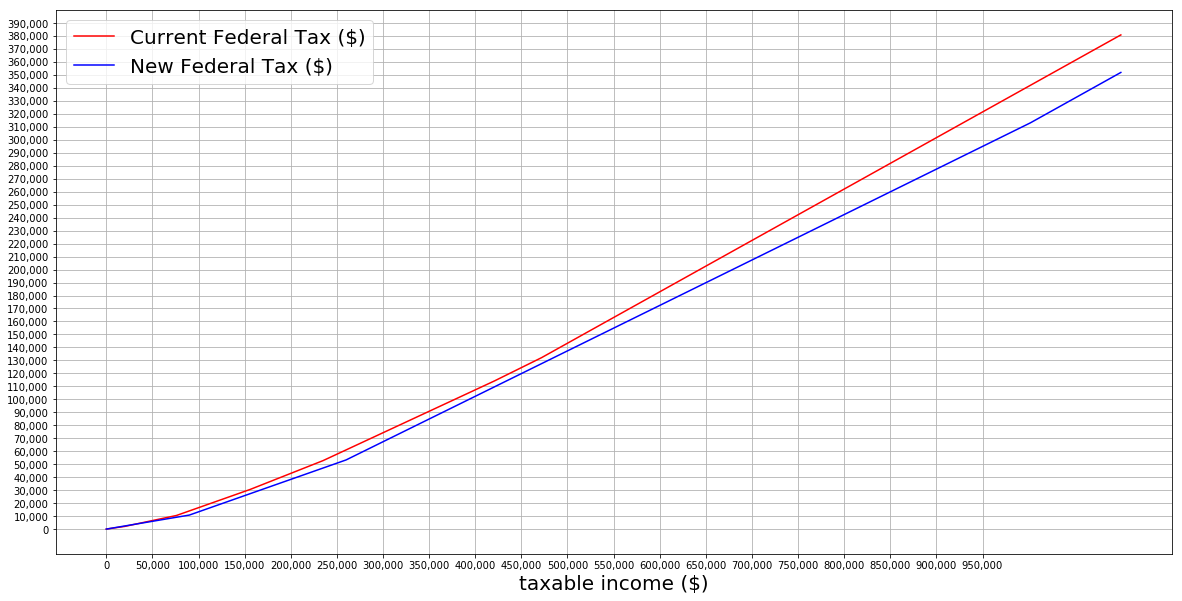

In [3]:
## type(bracket) = list
## type(rate) = list
def tax_calculator(taxable_income, bracket, rate):
    bracket2 = bracket[1:]
    bracket2.append(float('Inf'))
    bracket3 = [y-x for x,y in zip(bracket, bracket2)]
    income_seg = [min(max(0, taxable_income - x), y) for x, y in zip(bracket, bracket3)]
    return sum([x*y for x, y in zip(income_seg, rate)])

def old_bracket(taxable_income, joint = True):
    rate= [0.1, 0.15, 0.25, 0.28, 0.33, 0.35, 0.396]
    if not joint:
        bracket = [0, 9325, 37950, 91900, 191650, 416700, 418400]
    else:
        bracket = [0, 18650, 75900, 153100, 233350, 416700, 470700]
    return tax_calculator(taxable_income, bracket, rate) 

def new_bracket(taxable_income, joint = True):
    rate= [0.12, 0.25, 0.35, 0.396]
    if not joint:
        bracket = [0, 45000, 200000, 500000]
    else:
        bracket = [0, 90000, 260000, 1000000]
    return tax_calculator(taxable_income, bracket, rate) 

taxable_incomes = [1000*x for x in range(1101)]
old_taxes_joint = [old_bracket(taxable_income, joint = True) for taxable_income in taxable_incomes]
new_taxes_joint = [new_bracket(taxable_income, joint = True) for taxable_income in taxable_incomes]

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(taxable_incomes, old_taxes_joint, 'r', label = 'Current Federal Tax ($)') 
plt.plot(taxable_incomes, new_taxes_joint, 'b', label = 'New Federal Tax ($)')
plt.xlabel('taxable income ($)', fontsize = 20)
plt.xticks(np.arange(0, 1.0*1e6, 50000))
plt.yticks(np.arange(0, 4e5, 10000))
ax = plt.gca()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(fontsize = 20)
plt.grid()
plt.show()

相同taxable income, 新旧税法缴纳税款额度差:

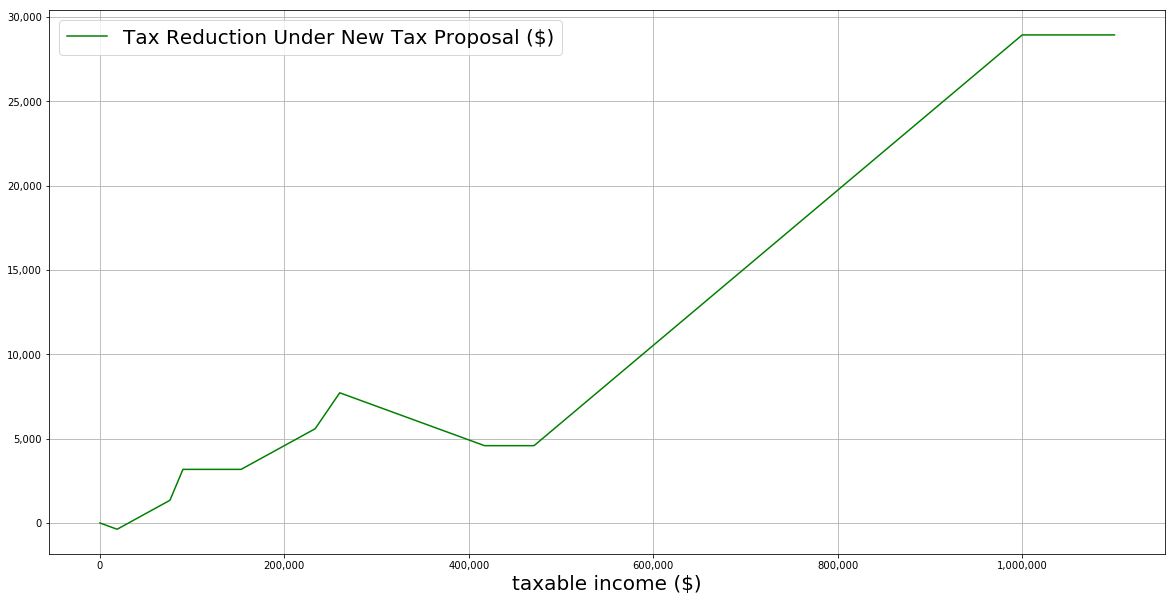

In [4]:
reduction = [x - y for x, y in zip(old_taxes_joint, new_taxes_joint)]
plt.figure(figsize=(20,10))
plt.plot(taxable_incomes, reduction, 'g', label = 'Tax Reduction Under New Tax Proposal ($)') 
plt.xlabel('taxable income ($)', fontsize = 20)
#plt.xticks(np.arange(0, 1e6, 50000))
#plt.yticks(np.arange(0, 4e5, 10000))
ax = plt.gca()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(fontsize = 20)
plt.grid()
plt.show()

# 2. 增加标准扣除(Standard Deduction)额度

美国收入联邦税的减免额度是有两套算法(AMT先不考虑): 标准扣除(Standard deduction)和列举扣除(itermized deduction). 报税时选择扣除额度多的方法. 

新的税法几乎加倍了标准扣除额度:
* 当前税法: 个人(Single)扣除额度$6,300; 家庭(Married Filing Jointly)扣除额度$12,600.
* 新税法: 个人(Single)扣除额度$12,000; 家庭(Married Filing Jointly)扣除额度$24,000.

对于用标准扣除
对于有房子的家庭, 房屋贷款所缴利息和房产税记起来很容易超过标准扣除的免税额度, 这项修改不会减少这些家庭的缴税.


# 3. 减少利息扣除
新版议案取消了对医疗开支、领养费用、学生债利息支付等列举扣除项目，对当前这些开支比较大的家庭税后收入有负面影响。
房贷利息的列举扣除上限也惨遭腰斩，新购房屋贷款要想申请利息支出的联邦税扣除，贷款总额上限为<font color = red>__50万__</font>美元，此前的上限为<font color = red>__100万__</font>美元。

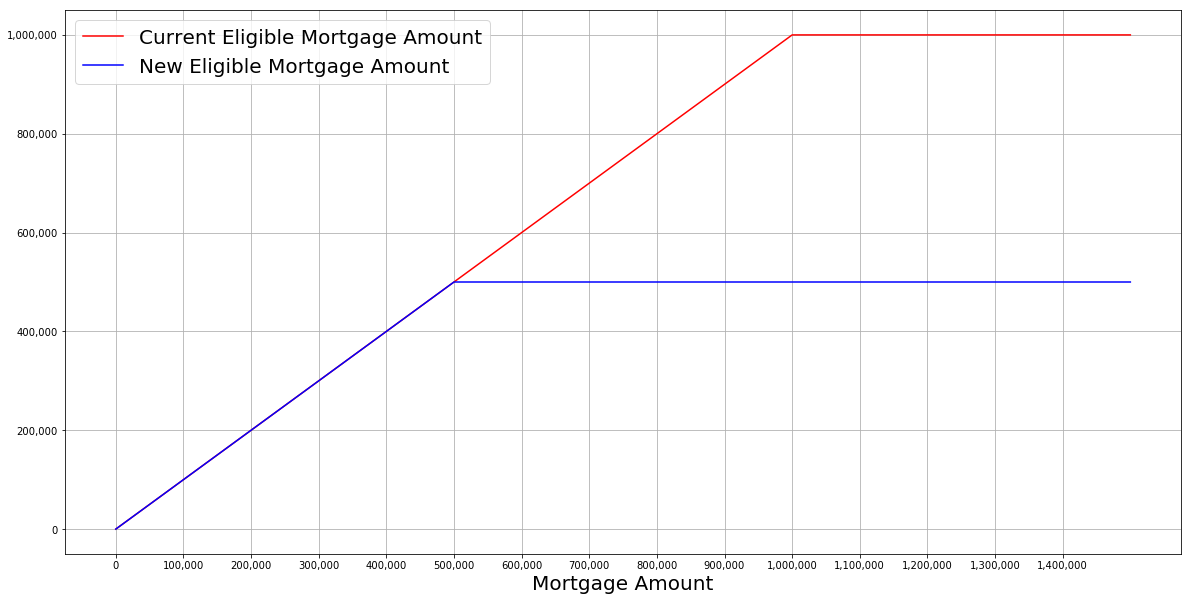

In [5]:
mortgage = [10000*x for x in range(151)]
old_eligible = [min(x, 1e6) for x in mortgage]
new_eligible = [min(x, 5*1e5) for x in mortgage]

plt.figure(figsize=(20,10))
plt.plot(mortgage, old_eligible, 'r', label = 'Current Eligible Mortgage Amount') 
plt.plot(mortgage, new_eligible, 'b', label = 'New Eligible Mortgage Amount')
plt.xlabel('Mortgage Amount', fontsize = 20)
plt.xticks(np.arange(0, 1.5*1e6, 100000))
plt.xticks(np.arange(0, 1.5*1e6, 100000))
ax = plt.gca()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(fontsize = 20)
plt.grid()
plt.show()

这项修改对贷款50万以下没有影响; 影响封顶100万. 对于大于100万的房屋贷款, 增加的taxable income = 50万*贷款利率.

举例


加州A家庭: 2018年房屋贷款额度__150万__, 利率__4%__. 根据当前税法, 所缴__100万*4% = 4.0万__利息都可计入联邦税扣除; 但按照新税法, 只有前50万产生的利息__2.0万__可计入联邦税扣除. 新税法下会多出__2.0万__的taxable income.

纽约B家庭: 2018年房屋贷款额度__80万__, 利率__4%__. 根据当前税法, 所缴__80万*4% = 3.2万__利息都可计入联邦税扣除; 但按照新税法, 只有前50万产生的利息__2.0万__可计入联邦税扣除. 新税法下会多出__1.2万__的taxable income.

In [6]:
def MTG_IR_deduction_old(UPB, rate):
    return UPB*rate

def MTG_IR_deduction_new(UPB, rate):
    return min(500000.0, UPB)*rate

print("Current Mortgage Interest Duduction with UPB = 1,000,000 and Rate = 4%: $", MTG_IR_deduction_old(1e6,0.04))
print("    New Mortgage Interest Duduction with UPB = 1,000,000 and Rate = 4%: $", MTG_IR_deduction_new(1e6,0.04))

Current Mortgage Interest Duduction with UPB = 1,000,000 and Rate = 4%: $ 40000.0
    New Mortgage Interest Duduction with UPB = 1,000,000 and Rate = 4%: $ 20000.0


# 4. 减少州与地方税收(房产税等)扣除
最新税改议案显示，取消州与地方个税和销售税在联邦税的扣除项目，仅保留州和地方房产税在联邦税的扣除，但上限设定为1万美元，且仅适用于个人和家庭。


举例

加州A家庭: 2018年收入__40万__, 缴纳州税__3.6万__, 缴纳房产税__1.5万__. 根据当前税法, 所缴__5.1万__都可计入联邦税扣除; 但按照新税法, 只有__1.0万__可计入联邦税扣除. 新税法下会多出__4.1万__的taxable income.

纽约B家庭: 2018年收入__30万__, 缴纳州税__1.8万__, 缴纳房产税__2.0万__. 根据当前税法, 所缴__3.8万__都可计入联邦税扣除; 但按照新税法, 只有__1.0万__可计入联邦税扣除. 新税法下会多出__2.8万__的taxable income.



In [7]:
def SALT_deduction_old(taxable_income, efficient_state_rate, local_tax):
    return taxable_income*efficient_state_rate + local_tax

def SALT_deduction_new(taxable_income, efficient_state_rate, local_tax):
    return min(10000.0, taxable_income*efficient_state_rate + local_tax)

print("Current Salt Duduction with income = 400,000, state rate = 9% and property tax = 15,000: $", SALT_deduction_old(400000, 0.09, 15000))
print("    New Salt Duduction with income = 400,000, state rate = 9% and property tax = 15,000: $", SALT_deduction_new(400000, 0.09, 15000))

Current Salt Duduction with income = 400,000, state rate = 9% and property tax = 15,000: $ 51000.0
    New Salt Duduction with income = 400,000, state rate = 9% and property tax = 15,000: $ 10000.0


# 5. 取消Personal Exemption

Personal Exemption同时适用于Standard Deduction和Itemized Deduction(不适用于AMT). 2017年每人每年\$4050豁免额度. 

Personal Exemption有Phae Out. 单人报税收入超过\$259,000 (联合报税家庭收入超过\$311,300), 收入每增加\$2,500, Exemption减少2%. 单人报税收入超过\$384,000 (联合报税收入超过\$436,300), Personal Exemption会完全消失.


举例

加州A家庭: 2018年收入40万, 联合报税, 家庭4人口. 收入超过\$311,300. Phase Out 额度2%*(400,000 - 311,300)/2500 = 70%. 根据当前税法, 可以享受(\$4,050)*(1-70%)*4 = \$4,860的免税额度. 新税法下这部分豁免为0.

纽约B家庭: 2018年收入30万, 联合报税, 家庭4人口. 收入不超过\$311,300. 没有Phase Out (\$4,050)*4 = \$16,200的免税额度. 新税法下这部分豁免为0.

In [8]:
def PersonalExemption_deduction_old(taxable_income, member, joint = True):
    if joint:
        phaseout = min(0.02*round((max(taxable_income - 311300, 0)/2500 + 1e-7)), 1)
        return int(4050*member*(1 - phaseout))
    else:
        phaseout = min(0.02*round(max(taxable_income - 259000, 0)/2500 + 1e-7), 1)
        return int(4050*member*(1 - phaseout))
    
def PersonalExemption_deduction_new():
    return 0

print("Current Personal Exemption with income = 400,000, 4 family member: $", PersonalExemption_deduction_old(400000, 4, joint = True))
print("    New Personal Exemption with income = 400,000, 4 family member: $", PersonalExemption_deduction_new())

Current Personal Exemption with income = 400,000, 4 family member: $ 4859
    New Personal Exemption with income = 400,000, 4 family member: $ 0


# 6. Child Care Tax Credit
当前税法下, 家庭内每位17岁(不包括17)以下儿童可以享受\$1,000的Child Care退税. 当单人报税收入超过\$55,000 (联合报税家庭收入超过\$110,000)的时候, 收入每增加\$1,000 退税减少\$50. (注意: 减少的\$50是总退税额, 不是每个孩子减少\$50).

新税法将退税额度提高到\$1,600. 同时将Phaseout收入提高至\$230,000(联合报税). 单人报税Phaseout还不清楚, 暂时假设为\$115,000.

当前税法联合报税家庭收入超过__11万__的部分, 每__2万__ phaseout一个儿童(\$1,000).

新税法联合报税家庭收入超过__23万__的部分, 每__3.2万__ phaseout一个儿童(\$1,600).

举例

加州A家庭: 2018年收入40万, 联合报税, 家庭4人口(2位17岁以下儿童). 当前税法下Phaseout额度\$50\*(400,000 - 110,000)/1000 = \$14,500, 新税法下Phaseout 额度\$50\*(400,000 - 230,000)/1000 = \$8,500. 都远超能拿到的credit(当前税法\$2,000 or 新税法\$3,200). 当前税法和新税法下Child Care退税均为\$0.

纽约B家庭: 2018年收入30万, 联合报税, 联合报税, 家庭4人口(2位17岁以下儿童). 当前税法下Phaseout额度\$50\*(300,000 - 110,000)/1000 = \$9,500, 新税法下Phaseout 额度\$50\*(300,000 - 230,000)/1000 = \$3,500. 都超国能拿到的credit(当前税法\$2,000 or 新税法\$3,200). 当前税法和新税法下Child Care退税均为\$0.




In [10]:
def ChildCare_Credit_old(taxable_income, child, joint = True):
    if joint:
        phaseout = round(max(taxable_income - 110000, 0)/20 + 1e-7)
        return int(max(0,1000*child -  phaseout))
    else:
        phaseout = round(max(taxable_income - 55000, 0)/20 + 1e-7)
        return int(max(0,1000*child -  phaseout))

    
def ChildCare_Credit_new(taxable_income, child, joint = True):
    if joint:
        phaseout = round(max(taxable_income - 230000, 0)/20 + 1e-7)
        return int(max(0,1600*child -  phaseout))
    else:
        phaseout = round(max(taxable_income - 115000, 0)/20 + 1e-7)
        return int(max(0,1600*child -  phaseout))
    

print("Current Child Care Tax Credit with income = 400,000, 4 family member: $", ChildCare_Credit_old(400000, 2, joint = True))
print("    New Child Care Tax Credit with income = 400,000, 4 family member: $", ChildCare_Credit_new(400000, 2, joint = True))
#print(ChildCare_Credit_old(250000, 1, joint = True))
#print(ChildCare_Credit_new(250000, 1, joint = True))

Current Child Care Tax Credit with income = 400,000, 4 family member: $ 0
    New Child Care Tax Credit with income = 400,000, 4 family member: $ 0


# 7. 取消AMT (Alternative Minimum Tax)

The Alternative Minimum Tax exemption amount for tax year 2017 is __\$54,300__ and begins to phase out at __\$120,700__ (__\$84,500__, for married couples filing jointly for whom the exemption begins to phase out at __\$160,900__). For tax year 2017, the __28 percent__ tax rate applies to taxpayers with taxable incomes above __\$187,800__ (__$93,900__ for married individuals filing separately).


In [11]:
def AMT_eligible(taxable_income, joint = True):
    if joint:
        if taxable_income >= 187800:
            return True
        else:
            return False
    else:
        if taxable_income >= 93900:
            return True
        else:
            return False

def AMT_exemption(taxable_income, joint = True):
    if joint:
        return max(0, 84500 - max(taxable_income - 160900, 0)/4)
    else:
        return max(0, 54300 - max(taxable_income - 120700, 0)/4)

print("Current AMT Exemption with income = 400,000: $", AMT_exemption(400000,joint = True))
print("Current AMT Exemption with income = 300,000: $", AMT_exemption(300000,joint = True))
print("Current AMT Exemption with income = 250,000: $", AMT_exemption(250000,joint = True))


Current AMT Exemption with income = 400,000: $ 24725.0
Current AMT Exemption with income = 300,000: $ 49725.0
Current AMT Exemption with income = 250,000: $ 62225.0


# 8. 逐步取消遗产税 (Estate Tax)
这个先不考虑...

# 9. 综合影响

不考虑AMT和遗产税的影响, 不考虑其他减免(401K, 529, etc...):
* 新税法对使用Standard Deduction的家庭会有减税作用
* 对使用Itemized Deduction, 取决于收入和利息/州税/房产税额度. 一般来说
    * 如果家庭收入高于50万, bracket简化带来的减税会高于利息/州税/房产税减免额度减少带来的税务增加. 最后会减税.
    * 如果家庭收入杜宇50万, 利息/州税/房产税减免额度减少带来的税务增加会高于bracket简化产生的减税. 最后会加税.

举例

* 上面提到的加州A家庭: 2018年收入__40万__, 缴纳房贷利息__4.0万__, 缴纳州税__3.6万__, 缴纳房产税__1.5万__. 新税法下会多出__6.1万__的应缴税收入. 这6.1万属于33%税率一档, 需要多缴纳__2.0万__的税. 但是根据第二个表格, 由于bracket简化, 40万收入可以大约省税__0.5万__. 所以在新税法下, A家庭最终会多缴税<font color = red>__1.5万__</font>.

但是如果A家庭收入达到__80万__, bracket简化带来的好处可以完全抵消利息/州税/房产税减免额度降低带来的坏处; 如果家庭收入多于__80万__, 新税法可以省更多的税.

* 上面提到的纽约B家庭: 2018年收入__30万__, 缴纳房贷利息__3.2万__, 缴纳州税__1.8万__, 缴纳房产税__2.0万__. 新税法下会多出__4.0万__的应缴税收入. 这4.0万属于33%税率一档, 需要多缴纳__1.32万__的税. 但是根据第二个表格, 由于bracket简化, 30万收入可以大约省税__0.7万__. 所以在新税法下, B家庭最终会多缴税<font color = red>__0.62万__</font>.

如果B家庭收入达到__70万__, bracket简化带来的好处可以完全抵消利息/州税/房产税减免额度降低带来的坏处.


新的税改法案
* 减税群体
    * 年收入 < 5万家庭. 省税几百至一两千
    * 用标准扣除家庭. 省税\$1,000 - \$4,000
    * 年收入 > 60万家庭. 省税\$1,000 - \$29,000

* 加税群体
    * 年收入超过10万, 低于50万, 有房贷, 高州税, 高房产税, 用列举扣除的家庭.

受Trump新税法影响最负面的州的特点: 中产多 高州税 高房价 高房产税:
   
<center><font color = blue>加州, 纽约, 新泽西 </font>

全是蓝的...

In [12]:
def tax_comparison(taxable_income, member, child, UPB, rate, efficient_state_rate, local_tax, joint = True, display = True):
    
# Personal exemption (applied to both standard and itemized)
    old_PersonalExemption_deduction = PersonalExemption_deduction_old(taxable_income, member, joint = joint)
# Child care tax credit (applied to both standard and itemized)
    old_ChildCare_Credit = ChildCare_Credit_old(taxable_income, child, joint = joint)
    new_ChildCare_Credit = ChildCare_Credit_new(taxable_income, child, joint = joint)
# Mortgage Interest Rate deduction (applied to itemized and AMT)
    old_MTG_IR_deduction= MTG_IR_deduction_old(UPB, rate)
    new_MTG_IR_deduction= MTG_IR_deduction_new(UPB, rate)
# State and local tax (applied to itemized only)
    old_SALT_deduction = SALT_deduction_old(taxable_income, efficient_state_rate, local_tax)       
    new_SALT_deduction = SALT_deduction_new(taxable_income, efficient_state_rate, local_tax)
    
# calculate standard tax
    if joint:
        old_standard_deduction = 12600
        new_standar_deduction = 24000
    else:
        old_standard_deduction = 6300
        new_standar_deduction = 12000
    # tax before Child care credit
    old_tax_beforeCCTC_standard = old_bracket(taxable_income - old_standard_deduction - old_PersonalExemption_deduction, joint = joint)
    new_tax_beforeCCTC_standard = new_bracket(taxable_income - new_standar_deduction, joint = joint)
    # tax before Child after credit
    old_tax_standard = max(0, old_tax_beforeCCTC_standard - old_ChildCare_Credit)
    new_tax_standard = max(0, new_tax_beforeCCTC_standard - new_ChildCare_Credit)
    
# calculate itemized tax    
    # tax before Child care credit
    old_tax_beforeCCTC_itemized = old_bracket(taxable_income - old_MTG_IR_deduction - old_SALT_deduction - old_PersonalExemption_deduction, joint = joint)
    new_tax_beforeCCTC_itemized = new_bracket(taxable_income - new_MTG_IR_deduction - new_SALT_deduction, joint = joint)
    # tax before Child after credit
    old_tax_itemized = max(0, old_tax_beforeCCTC_itemized - old_ChildCare_Credit)
    new_tax_itemized = max(0, new_tax_beforeCCTC_itemized - new_ChildCare_Credit)

# calculate AMT tax    
    if AMT_eligible(taxable_income, joint = joint):
        AMT_exemption_amount = AMT_exemption(taxable_income, joint = joint)
        # tax before Child care credit
        old_tax_beforeCCTC_AMT = old_bracket(taxable_income - AMT_exemption_amount, joint = joint)
        # tax before Child after credit
        old_tax_AMT = max(0, old_tax_beforeCCTC_AMT - old_ChildCare_Credit)

    
    if AMT_eligible(taxable_income, joint = joint):
        tax_old = max(min(old_tax_standard, old_tax_itemized),old_tax_AMT)
    else:
        tax_old = min(old_tax_standard, old_tax_itemized)
    tax_new = min(new_tax_standard, new_tax_itemized)

    if display:
        print("Current Tax Should Pay: $%3.2f"%tax_old)
        print("    Standard: $%3.2f"%old_tax_standard)
        print("    Itemized: $%3.2f"%old_tax_itemized)
        if AMT_eligible(taxable_income, joint = joint):
            print("     AMT tax: $%3.2f"%old_tax_AMT)

        print("New Tax Should Pay: $%3.2f"%tax_new)
        print("    Standard: $%3.2f"%new_tax_standard)
        print("    Itemized: $%3.2f"%new_tax_itemized)
    return [tax_old, tax_new]
    
               
tax_comparison(400000, 4, 2, 1500000, 0.04, 0.09, 15000, joint = True)  
tax_comparison(300000, 4, 2, 1500000, 0.04, 0.06, 20000, joint = True)  
tax_comparison(250000, 4, 2, 700000, 0.03, 0.06, 18000, joint = True)  
tax_comparison(240000, 4, 2, 700000, 0.03, 0.06, 18000, joint = True)  

Current Tax Should Pay: $99057.75
    Standard: $101455.53
    Itemized: $68983.53
     AMT tax: $99057.75
New Tax Should Pay: $91800.00
    Standard: $93900.00
    Itemized: $91800.00
Current Tax Should Pay: $57807.75
    Standard: $64713.00
    Itemized: $38908.50
     AMT tax: $57807.75
New Tax Should Pay: $56800.00
    Standard: $58900.00
    Itemized: $56800.00
Current Tax Should Pay: $39461.50
    Standard: $48820.50
    Itemized: $37228.50
     AMT tax: $39461.50
New Tax Should Pay: $42350.00
    Standard: $42600.00
    Itemized: $42350.00
Current Tax Should Pay: $35961.50
    Standard: $46020.50
    Itemized: $34596.50
     AMT tax: $35961.50
New Tax Should Pay: $39350.00
    Standard: $39600.00
    Itemized: $39350.00


[35961.5, 39350.0]

* 联合报税
* 收入:      20万
* 家庭成员:     2
* 17岁以下儿童: 0
* 房贷:       0万
* 房贷利率:    0%
* 州税率:      9%
* 地税($):     0

当前应缴联邦税: __\$35576.50__

新税法应缴联邦税: __\$32300.00__

In [145]:
tax_comparison(200000, 2, 0, 0, 0.00, 0.09, 0, joint = True)  

Current Tax Should Pay: $35576.50
    Standard: $37088.50
    Itemized: $35576.50
     AMT tax: $22796.25
New Tax Should Pay: $32300.00
    Standard: $32300.00
    Itemized: $35800.00


* 联合报税
* 收入:      20万
* 家庭成员:     2
* 17岁以下儿童: 0
* 房贷:      100万
* 房贷利率:    4%
* 州税率:      9%
* 地税($):   1万


当前应缴联邦税: __\$22796.50__

新税法应缴联邦税: __\$30800.00__

In [156]:
tax_comparison(200000, 2, 0, 1000000, 0.04, 0.09, 10000, joint = True)  

Current Tax Should Pay: $22796.25
    Standard: $37088.50
    Itemized: $22452.50
     AMT tax: $22796.25
New Tax Should Pay: $30800.00
    Standard: $32300.00
    Itemized: $30800.00


In [157]:
tax_comparison(400000, 2, 0, 2000000, 0.04, 0.09, 20000, joint = True)  

Current Tax Should Pay: $99057.75
    Standard: $102257.43
    Itemized: $61535.43
     AMT tax: $99057.75
New Tax Should Pay: $91800.00
    Standard: $93900.00
    Itemized: $91800.00


In [155]:
tax_comparison(150000, 4, 2, 700000, 0.04, 0.06, 20000, joint = True)  

Current Tax Should Pay: $10677.50
    Standard: $21777.50
    Itemized: $10677.50
New Tax Should Pay: $15100.00
    Standard: $16600.00
    Itemized: $15100.00


* 联合报税
* 收入:      20万
* 家庭成员:     4
* 17岁以下儿童: 2
* 房贷:      80万
* 房贷利率:    3%
* 州税率:      6%
* 地税($):   1.8万



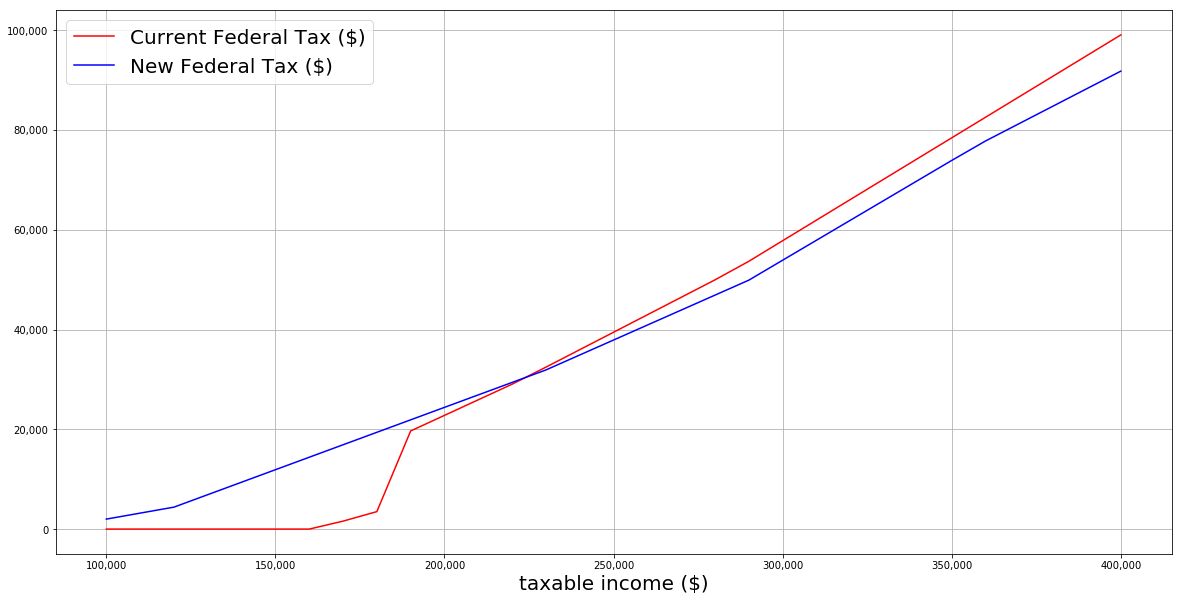

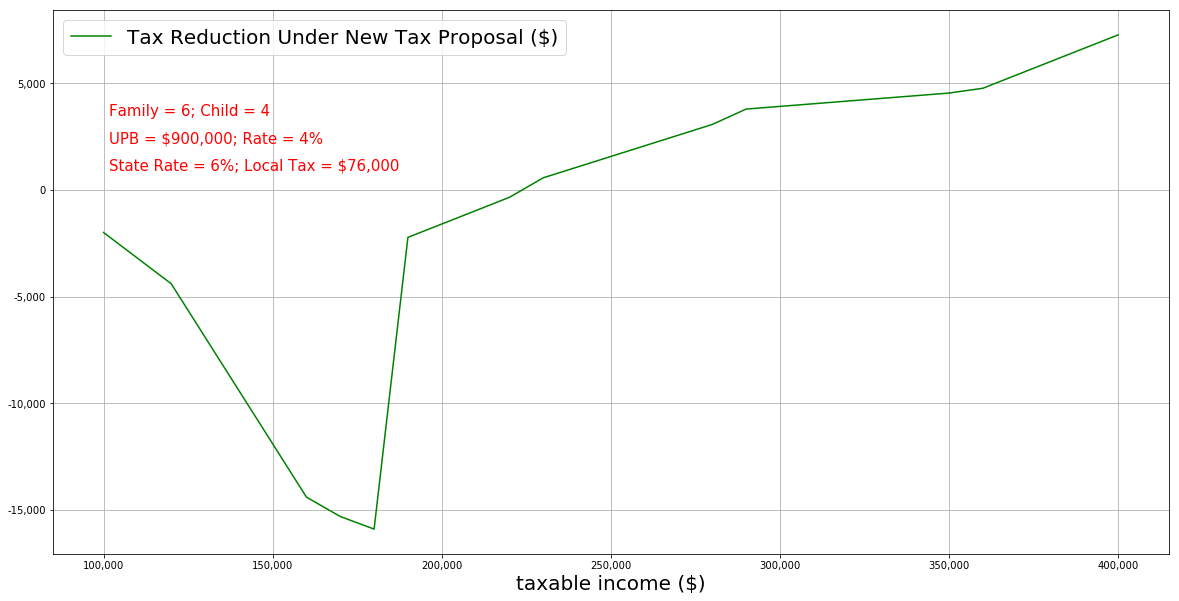

In [49]:
member = 6
child = 4
UPB = 900000
rate = 0.04
efficient_state_rate = 0.06
local_tax = 76000
joint = True

taxable_incomes = [10000*x for x in range(10, 41)]
taxes = [tax_comparison(taxable_income, member, child, UPB, rate, efficient_state_rate, local_tax, joint = joint, display = False)  for taxable_income in taxable_incomes]
taxes_old = [x[0] for x in taxes]
taxes_new = [x[1] for x in taxes]
tax_reductions = [x[0] - x[1] for x in taxes]



plt.figure(figsize=(20,10))
plt.plot(taxable_incomes, taxes_old, 'r', label = 'Current Federal Tax ($)') 
plt.plot(taxable_incomes, taxes_new, 'b', label = 'New Federal Tax ($)')
plt.xlabel('taxable income ($)', fontsize = 20)
#plt.xticks(np.arange(0, 1.0*1e6, 50000))
#plt.yticks(np.arange(0, 4e5, 10000))
ax = plt.gca()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(fontsize = 20)
plt.grid()
plt.show()


plt.figure(figsize=(20,10))
plt.plot(taxable_incomes, tax_reductions, 'g', label = 'Tax Reduction Under New Tax Proposal ($)') 
plt.xlabel('taxable income ($)', fontsize = 20)
ax = plt.gca()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.text(0.05, 0.80, 'Family = %d; Child = %d'%(member, child),
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
ax.text(0.05, 0.75, 'UPB = ${:,}'.format(UPB) + '; Rate = %d%%'%(rate*100),
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
ax.text(0.05, 0.70, 'State Rate = %d%%'%(efficient_state_rate*100) + '; Local Tax = ${:,}'.format(local_tax),
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)

plt.legend(fontsize = 20)
plt.grid()
plt.show()




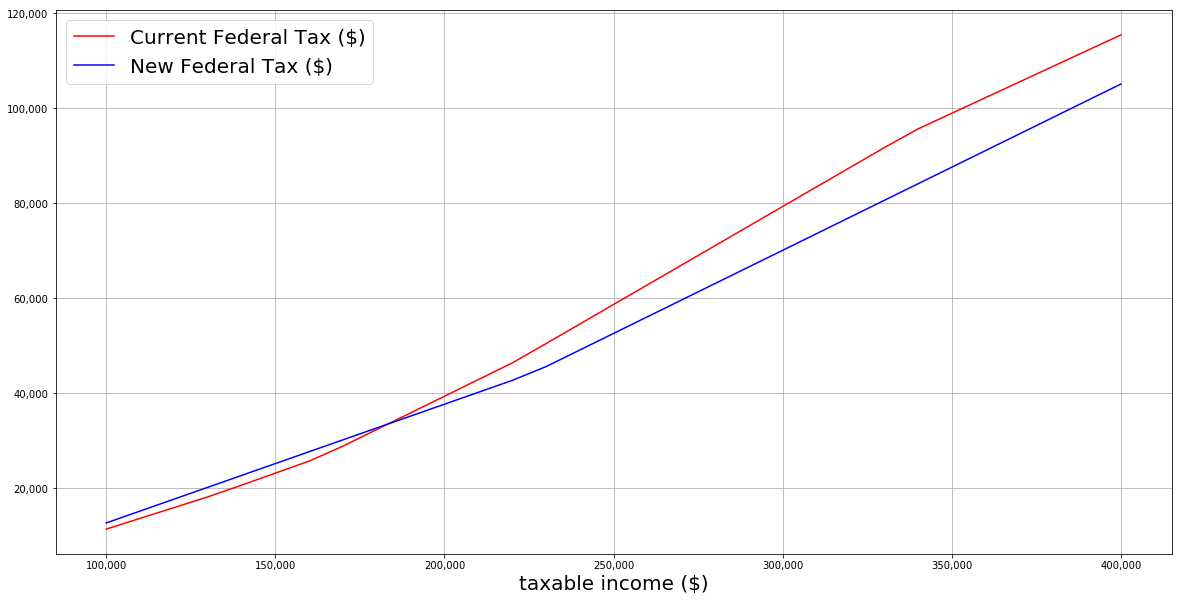

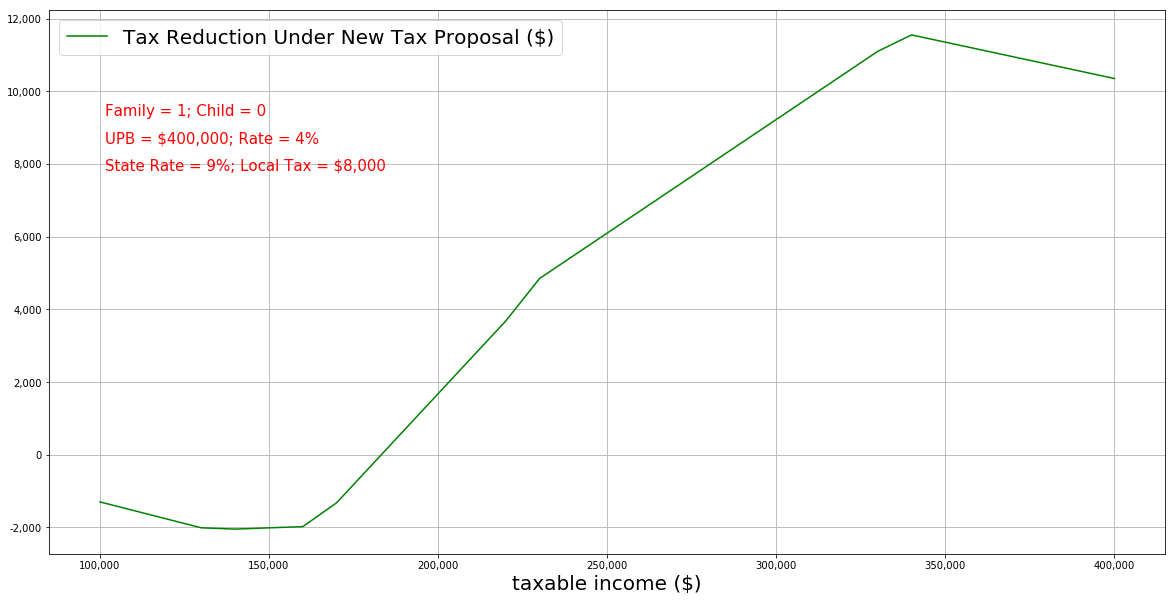

In [52]:
member = 1
child = 0
UPB = 400000
rate = 0.04
efficient_state_rate = 0.095
local_tax = 8000
joint = False

taxable_incomes = [10000*x for x in range(10, 41)]
taxes = [tax_comparison(taxable_income, member, child, UPB, rate, efficient_state_rate, local_tax, joint = joint, display = False)  for taxable_income in taxable_incomes]
taxes_old = [x[0] for x in taxes]
taxes_new = [x[1] for x in taxes]
tax_reductions = [x[0] - x[1] for x in taxes]



plt.figure(figsize=(20,10))
plt.plot(taxable_incomes, taxes_old, 'r', label = 'Current Federal Tax ($)') 
plt.plot(taxable_incomes, taxes_new, 'b', label = 'New Federal Tax ($)')
plt.xlabel('taxable income ($)', fontsize = 20)
#plt.xticks(np.arange(0, 1.0*1e6, 50000))
#plt.yticks(np.arange(0, 4e5, 10000))
ax = plt.gca()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(fontsize = 20)
plt.grid()
plt.show()


plt.figure(figsize=(20,10))
plt.plot(taxable_incomes, tax_reductions, 'g', label = 'Tax Reduction Under New Tax Proposal ($)') 
plt.xlabel('taxable income ($)', fontsize = 20)
ax = plt.gca()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.text(0.05, 0.80, 'Family = %d; Child = %d'%(member, child),
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
ax.text(0.05, 0.75, 'UPB = ${:,}'.format(UPB) + '; Rate = %d%%'%(rate*100),
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)
ax.text(0.05, 0.70, 'State Rate = %d%%'%(efficient_state_rate*100) + '; Local Tax = ${:,}'.format(local_tax),
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=15)

plt.legend(fontsize = 20)
plt.grid()
plt.show()





# 10. 结论

在新税法下, 如何避免加税:

* 搬离<font color = blue>加州, 纽约, 新泽西 </font>
* 争做有钱人 (收入 > 60万)
* 开公司, 给自己打工